USAR LA GRANGION 

In [1]:
pip install numpy pandas matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[ 48.43774677  51.82999961  55.17467122 ... 360.0004018  360.00059536
 360.00078815]


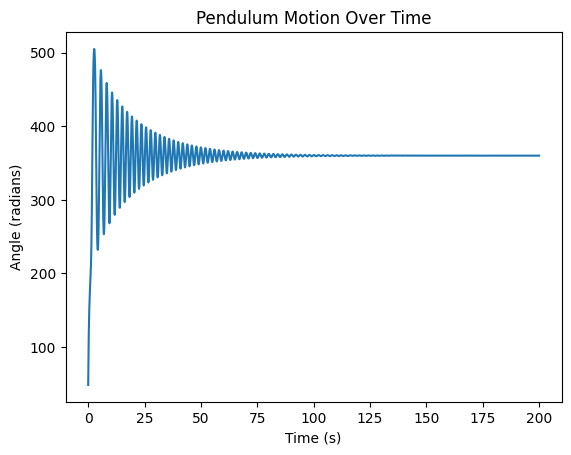

In [2]:
#single pendulum simulation/example

import numpy as np
import matplotlib.pyplot as plt

g = 9.81 # acceleration due to gravity (m/s^2)
L = 1.0 # length of pendulum (m)
mu = 0.1 # mass of pendulum (kg)

theta_0 = np.pi / 4 # initial angle (45 degrees)
theta_dot_0 = 6.0 # initial angular velocity

def theta_ddot(theta, theta_dot):
    return -mu *theta_dot - (g / L) * np.sin(theta)

def theta(t):
    theta = theta_0
    theta_dot = theta_dot_0
    dt = 0.01

    theta_values = []

    for time in np.arange(0, t, dt):
        theta += theta_dot * dt
        theta_dot += theta_ddot(theta, theta_dot) * dt
        theta_values.append(theta*(180/np.pi)) # Convert to degrees

    return np.array(theta_values)

def theta_dot(t):
    theta = theta_0
    theta_dot = theta_dot_0
    dt = 0.01

    theta_dot_values = []

    for time in np.arange(0, t, dt):
        theta += theta_dot * dt
        theta_dot += theta_ddot(theta, theta_dot) * dt
        theta_dot_values.append(theta_dot)  

    return np.array(theta_dot_values)

def plot_pendulum_motion_overTime(t):
    theta_values = theta(t)
    
    print(theta_values)

    plt.plot(np.arange(0, t, 0.01), theta_values)
    plt.title('Pendulum Motion Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (radians)')
    

def plot_pendulum_motion_Vel(t):
    theta_values = theta(t)
    theta_dot_values = theta_dot(t)
    
    plt.plot(theta_values, theta_dot_values)
    plt.title('angle vs. velocity')
    plt.xlabel('angle (degrees)')
    plt.ylabel('velocity (rad/s)')
    plt.grid()


# plot_pendulum_motion_Vel(12)
plot_pendulum_motion_overTime(200)

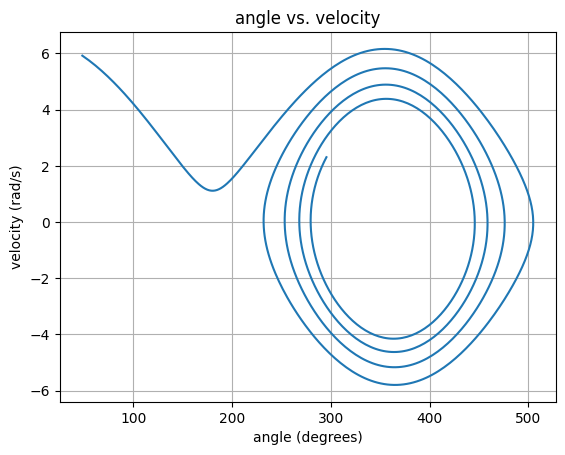

In [3]:
plot_pendulum_motion_Vel(12)

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.81
L = 1.0
mu = 0.1  # Set to >0 to simulate damping (friction)

# θ'' = -μθ' - (g/L)sin(θ)
def theta_ddot(theta, theta_dot):
    return -mu * theta_dot - (g / L) * np.sin(theta)

# Simulate trajectory using Euler method
def simulate_trajectory(theta0, theta_dot0, t_max=10, dt=0.01):
    theta = theta0
    theta_dot = theta_dot0

    thetas = []
    theta_dots = []

    for _ in np.arange(0, t_max, dt):
        thetas.append(theta)
        theta_dots.append(theta_dot)

        theta_dot += theta_ddot(theta, theta_dot) * dt
        theta += theta_dot * dt

    return np.array(thetas), np.array(theta_dots)

# Plot the vector field and trajectory
def plot_phase_space(theta0=np.pi/3, theta_dot0=0.0, t_max=10):
    # Grid for vector field
    theta_vals = np.linspace(-2*np.pi, 2*np.pi, 30)
    theta_dot_vals = np.linspace(-4, 4, 30)
    T, T_dot = np.meshgrid(theta_vals, theta_dot_vals)

    dtheta = T_dot
    dtheta_dot = theta_ddot(T, T_dot)

    # Normalize arrows for better visibility
    mag = np.sqrt(dtheta**2 + dtheta_dot**2)
    dtheta /= mag
    dtheta_dot /= mag

    plt.figure(figsize=(10, 6))
    plt.quiver(T, T_dot, dtheta, dtheta_dot, angles='xy', scale=20, width=0.005, color='gold')

    # Plot trajectory
    thetas, theta_dots = simulate_trajectory(theta0, theta_dot0, t_max)
    plt.plot(thetas, theta_dots, color='cyan', lw=2)

    # Style
    plt.title("Phase Space of a Pendulum")
    plt.xlabel(r"$\theta$ (radians)")
    plt.ylabel(r"$\dot{\theta}$ (rad/s)")
    plt.xlim(-2*np.pi, 2*np.pi)
    plt.ylim(-4, 4)
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()


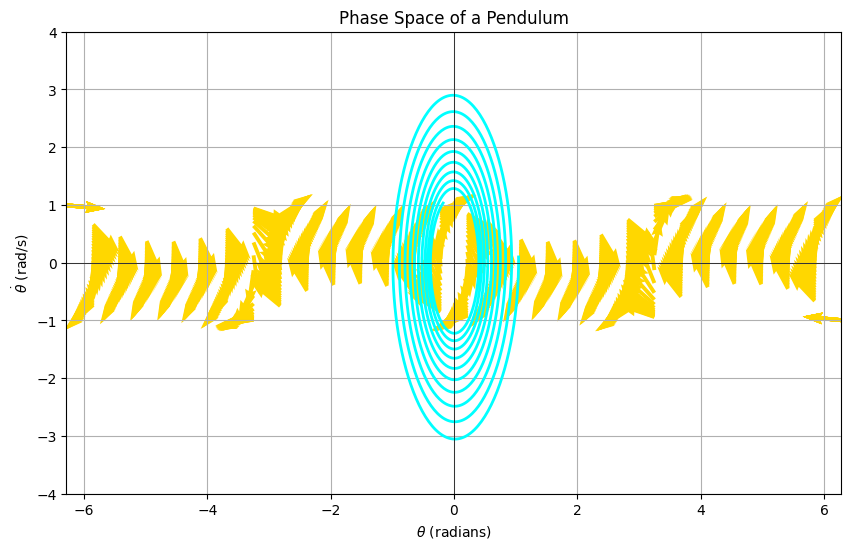

In [55]:
plot_phase_space(theta0=np.pi/3, theta_dot0=0.1, t_max=20)

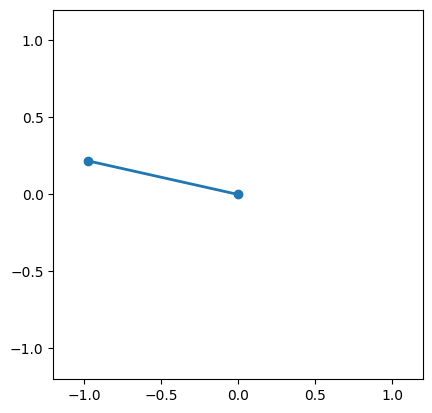

MovieWriter ffmpeg unavailable; using Pillow instead.


In [74]:
#simulate trajectory

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
g = 9.81    # gravity (m/s^2)
L = 1.0     # length of pendulum (m)
theta0 = np.pi / 4  # initial angle (45 degrees)
omega0 = 1.0        # initial angular velocity
mu = 0.1    # damping coefficient

# Time settings
dt = 0.01
t_max = 10
t = np.arange(0, t_max, dt)

# Initialize arrays
theta = np.zeros_like(t)
omega = np.zeros_like(t)
theta[0] = theta0
omega[0] = omega0

# Solve using simple Euler method
for i in range(1, len(t)):

    theta_dot = omega0

    alpha = - mu*theta_dot - (g / L) * np.sin(theta[i-1])
    omega[i] = omega[i-1] + alpha * dt
    theta[i] = theta[i-1] + omega[i] * dt

    theta += theta_dot * dt
    theta_dot += theta_ddot(theta, theta_dot) * dt

# Convert to x, y
x = L * np.sin(theta)
y = -L * np.cos(theta)

# Set up the plot
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-L-0.2, L+0.2)
ax.set_ylim(-L-0.2, L+0.2)
line, = ax.plot([], [], 'o-', lw=2)

# Animation update function
def update(frame):
    line.set_data([0, x[frame]], [0, y[frame]])
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=len(t), interval=dt*1000, blit=True)
plt.show()
ani.save('pendulum_animation.gif', writer='ffmpeg', fps=30)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constantes
g      = 9.81            # gravedad (m/s^2)
L      = 1.0             # longitud del péndulo (m)
theta0 = np.pi / 4       # ángulo inicial (45°)
omega0 = 1.0             # velocidad angular inicial
mu     = 0.1             # coeficiente de amortiguamiento

# Parámetros temporales
dt    = 0.01
t_max = 10
t     = np.arange(0, t_max, dt)

# Inicialización de arrays
theta = np.zeros_like(t)
omega = np.zeros_like(t)
theta[0] = theta0
omega[0] = omega0

# Iteración con Euler explícito
for i in range(1, len(t)):
    # 1) Calcular aceleración angular
    alpha = - (g/L) * np.sin(theta[i-1]) - mu * omega[i-1]
    # 2) Actualizar posición angular
    theta[i] = theta[i-1] + omega[i-1] * dt
    # 3) Actualizar velocidad angular
    omega[i] = omega[i-1] + alpha * dt

# Convertir a coordenadas cartesianas
x = L * np.sin(theta)
y = -L * np.cos(theta)

# Preparar animación (igual que antes)
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-L-2*dt, L+2*dt)
ax.set_ylim(-L-2*dt, L+2*dt)
line, = ax.plot([], [], 'o-', lw=2)

def update(frame):
    line.set_data([0, x[frame]], [0, y[frame]])
    return line,

ani = FuncAnimation(fig, update, frames=len(t), interval=dt*1000, blit=True)
plt.show()
# Guarda si lo deseas:
# ani.save('pendulo_corregido.gif', writer='ffmpeg', fps=30)

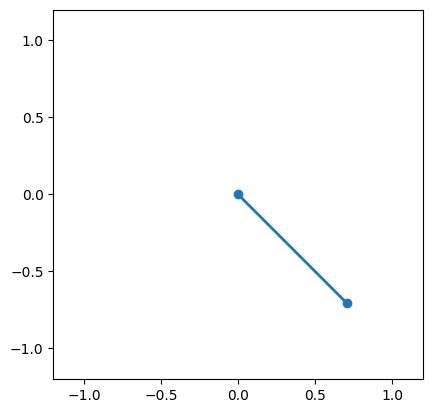

MovieWriter ffmpeg unavailable; using Pillow instead.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ——— Parámetros físicos ———
g       = 9.81        # aceleración de la gravedad (m/s²)
L       = 1.0         # longitud de la cuerda (m)
theta0  = np.pi / 4   # ángulo inicial (45°)
omega0  = 1.0         # velocidad angular inicial (rad/s)

# ——— Parámetros de simulación ———
dt      = 0.01        # paso de tiempo (s)
t_max   = 10          # tiempo total de simulación (s)
t       = np.arange(0, t_max, dt)

# ——— Inicialización en (x, y) y (vx, vy) ———
x_arr  = np.zeros_like(t)
y_arr  = np.zeros_like(t)
vx_arr = np.zeros_like(t)
vy_arr = np.zeros_like(t)

# condiciones iniciales convertidas de (θ, ω) a (x, y, vx, vy)
x_arr[0]  =  L * np.sin(theta0)
y_arr[0]  = -L * np.cos(theta0)
vx_arr[0] =  L * omega0 * np.cos(theta0)
vy_arr[0] =  L * omega0 * np.sin(theta0)

# ——— Bucle de integración (Euler explícito + corrección de restricción) ———
for i in range(1, len(t)):
    x, y   = x_arr[i-1],  y_arr[i-1]
    vx, vy = vx_arr[i-1], vy_arr[i-1]
    
    # 1) Encuentra el multiplicador de Lagrange λ que asegura r=L
    v2  = vx**2 + vy**2
    lam = (v2 - g * y) / L**2
    
    # 2) Calcula las aceleraciones: tensión + gravedad
    ax = -lam * x
    ay = -g  - lam * y
    
    # 3) Euler para velocidades
    vx_new = vx + ax * dt
    vy_new = vy + ay * dt
    
    # 4) Euler para posiciones
    x_new = x + vx_new * dt
    y_new = y + vy_new * dt
    
    # 5) Corrección numérica de la longitud (fuerza la restricción)
    norm = np.hypot(x_new, y_new)
    x_new *= L / norm
    y_new *= L / norm
    
    # 6) Guardar en los arrays
    x_arr[i],  y_arr[i]  = x_new,  y_new
    vx_arr[i], vy_arr[i] = vx_new, vy_new

# ——— Conversión a coordenadas para graficar ———
# (ya tenemos x_arr, y_arr)

# ——— Creación de la animación ———
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-L-0.2, L+0.2)
ax.set_ylim(-L-0.2, L+0.2)
line, = ax.plot([], [], 'o-', lw=2)

def update(frame):
    line.set_data([0, x_arr[frame]], [0, y_arr[frame]])
    return line,

ani = FuncAnimation(fig, update, frames=len(t), interval=dt*1000, blit=True)
plt.show()

# Para guardar:
ani.save('pendulo_con_restriccion.gif', writer='ffmpeg', fps=30)

In [80]:
from numpy import *

dat = linspace(0.1, 3, 6)
dat

array([0.1 , 0.68, 1.26, 1.84, 2.42, 3.  ])

Double pendulum

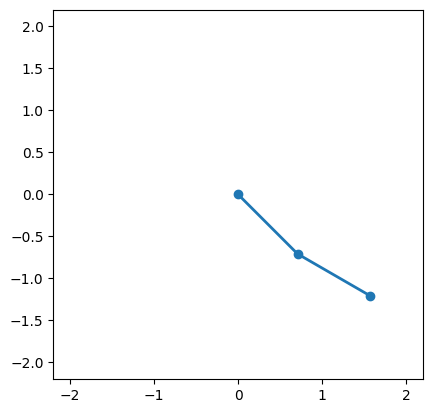

MovieWriter ffmpeg unavailable; using Pillow instead.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Physical parameters
g = 9.81       # gravity (m/s^2)
L1 = 1.0       # length of pendulum 1 (m)
L2 = 1.0       # length of pendulum 2 (m)

# Initial angles (radians) and angular velocities (rad/s)
theta1_0 = np.pi / 4    # 45 degrees
theta2_0 = np.pi / 3    # 60 degrees
omega1_0 = 0.0
omega2_0 = 0.0

# Simulation parameters
dt = 0.01              # time step (s)
t_max = 10             # total simulation time (s)
t = np.arange(0, t_max, dt)

# Arrays to store theta and omega
theta1 = np.zeros_like(t)
theta2 = np.zeros_like(t)
omega1 = np.zeros_like(t)
omega2 = np.zeros_like(t)

# Initial conditions
theta1[0] = theta1_0
theta2[0] = theta2_0
omega1[0] = omega1_0
omega2[0] = omega2_0

def accelerations(theta1, theta2, omega1, omega2):
    delta = theta2 - theta1
    denom1 = (2 - np.cos(2*delta))
    
    # Angular acceleration of pendulum 1
    num1 = (-g*(2*np.sin(theta1) + np.sin(theta1 - 2*theta2))
            - 2*np.sin(delta)*((omega2**2)*L2 + (omega1**2)*L1*np.cos(delta)))
    alpha1 = num1 / (L1 * denom1)
    
    # Angular acceleration of pendulum 2
    num2 = (2*np.sin(delta)*((omega1**2)*L1*2 + g*(2*np.cos(theta1) + np.cos(theta1 - 2*theta2))
            + (omega2**2)*L2*np.cos(delta)))
    alpha2 = num2 / (L2 * denom1)
    
    return alpha1, alpha2

# Numerical integration (Euler method)
for i in range(1, len(t)):
    alpha1, alpha2 = accelerations(theta1[i-1], theta2[i-1], omega1[i-1], omega2[i-1])
    omega1[i] = omega1[i-1] + alpha1 * dt
    omega2[i] = omega2[i-1] + alpha2 * dt
    theta1[i] = theta1[i-1] + omega1[i] * dt
    theta2[i] = theta2[i-1] + omega2[i] * dt

# Convert angles to x, y coordinates
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Create animation
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)
line, = ax.plot([], [], 'o-', lw=2)

def update(frame):
    line.set_data([0, x1[frame], x2[frame]], [0, y1[frame], y2[frame]])
    return line,

ani = FuncAnimation(fig, update, frames=len(t), interval=dt*1000, blit=True)
plt.show()

# To save animation as a gif file, uncomment below:
ani.save('double_pendulum.gif', writer='ffmpeg', fps=30)

In [7]:
(np.pi/2)

1.5707963267948966

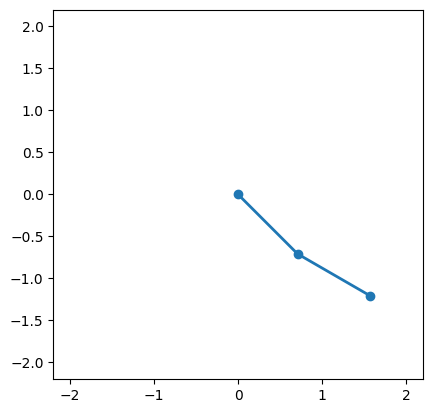

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Physical parameters
g = 9.81       # gravity (m/s^2)
L1 = 1.0       # length of pendulum 1 (m)
L2 = 1.0       # length of pendulum 2 (m)
M1 = 1.0       # mass of pendulum 1 (kg)
M2 = 1.0       # mass of pendulum 2 (kg), larger mass will experience stronger gravity effect

# Initial angles (radians) and angular velocities (rad/s)
theta1_0 = np.pi / 2    # 45 degrees
theta2_0 = np.pi / 3    # 60 degrees
omega1_0 = 0.0
omega2_0 = 0.0

# Simulation parameters
dt = 0.01              # time step (s)
t_max = 10             # total simulation time (s)
t = np.arange(0, t_max, dt)

# Arrays to store theta and omega
theta1 = np.zeros_like(t)
theta2 = np.zeros_like(t)
omega1 = np.zeros_like(t)
omega2 = np.zeros_like(t)

# Initial conditions
theta1[0] = theta1_0
theta2[0] = theta2_0
omega1[0] = omega1_0
omega2[0] = omega2_0

def accelerations(theta1, theta2, omega1, omega2):
    delta = theta2 - theta1
    den1 = (M1 + M2)*L1 - M2*L1*np.cos(delta)**2
    
    alpha1 = ((M2*L1*omega1**2*np.sin(delta)*np.cos(delta) +
               M2*g*np.sin(theta2)*np.cos(delta) +
               M2*L2*omega2**2*np.sin(delta) -
               (M1 + M2)*g*np.sin(theta1)) / den1)
    
    den2 = (L2/L1)*den1
    
    alpha2 = ((- M2*L2*omega2**2*np.sin(delta)*np.cos(delta) +
               (M1 + M2)*g*np.sin(theta1)*np.cos(delta) -
               (M1 + M2)*L1*omega1**2*np.sin(delta) -
               (M1 + M2)*g*np.sin(theta2)) / den2)
    
    return alpha1, alpha2

# Numerical integration (Euler method)
for i in range(1, len(t)):
    alpha1, alpha2 = accelerations(theta1[i-1], theta2[i-1], omega1[i-1], omega2[i-1])
    omega1[i] = omega1[i-1] + alpha1 * dt
    omega2[i] = omega2[i-1] + alpha2 * dt
    theta1[i] = theta1[i-1] + omega1[i] * dt
    theta2[i] = theta2[i-1] + omega2[i] * dt

# Convert angles to x, y coordinates
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Create animation
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)
line, = ax.plot([], [], 'o-', lw=2)

def update(frame):
    line.set_data([0, x1[frame], x2[frame]], [0, y1[frame], y2[frame]])
    return line,

ani = FuncAnimation(fig, update, frames=len(t), interval=dt*1000, blit=True)
plt.show()

# To save animation as a gif file, uncomment below:
ani.save('double_pendulum_with_masses.gif', writer='ffmpeg', fps=30)


In [11]:
(np.pi/1)*(180/np.pi)

180.0

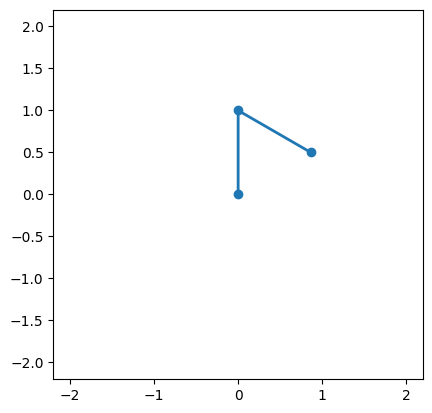

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#Code provided by Perplexity but modified by me

# Constants
g = 9.81      # gravity (m/s^2)
L1 = 1.0      # length of first rod (m)
L2 = 1.0      # length of second rod (m)
M1 = 1.0      # mass of first bob (kg)
M2 = 2.0      # mass of second bob (kg)

# Initial angles and angular velocities
theta1_0 = np.pi / 1
theta2_0 = np.pi / 3
omega1_0 = 0.0
omega2_0 = 0.0

dt = 0.01    # time step (s)
t_max = 10   # total time (s)
t = np.arange(0, t_max, dt)

# Arrays to hold theta and omega values over time
theta1 = np.zeros_like(t)
theta2 = np.zeros_like(t)
omega1 = np.zeros_like(t)
omega2 = np.zeros_like(t)

theta1[0] = theta1_0
theta2[0] = theta2_0
omega1[0] = omega1_0
omega2[0] = omega2_0

def accelerations(theta1, theta2, omega1, omega2):
    delta = theta2 - theta1
    den1 = (M1 + M2) * L1 - M2 * L1 * np.cos(delta) * np.cos(delta)

    a1 = ((M2 * L1 * omega1**2 * np.sin(delta) * np.cos(delta) +
          M2 * g * np.sin(theta2) * np.cos(delta) +
          M2 * L2 * omega2**2 * np.sin(delta) -
          (M1 + M2) * g * np.sin(theta1)) / den1)

    den2 = (L2 / L1) * den1

    a2 = ((-M2 * L2 * omega2**2 * np.sin(delta) * np.cos(delta) +
          (M1 + M2) * g * np.sin(theta1) * np.cos(delta) -
          (M1 + M2) * L1 * omega1**2 * np.sin(delta) -
          (M1 + M2) * g * np.sin(theta2)) / den2)

    return a1, a2

# Integration by Euler method
for i in range(1, len(t)):
    a1, a2 = accelerations(theta1[i-1], theta2[i-1], omega1[i-1], omega2[i-1])
    omega1[i] = omega1[i-1] + a1 * dt
    omega2[i] = omega2[i-1] + a2 * dt
    theta1[i] = theta1[i-1] + omega1[i] * dt
    theta2[i] = theta2[i-1] + omega2[i] * dt

# Compute positions of bobs
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)

x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Plot animation
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)
line, = ax.plot([], [], 'o-', lw=2)

def update(frame):
    line.set_data([0, x1[frame], x2[frame]], [0, y1[frame], y2[frame]])
    return line,

ani1 = FuncAnimation(fig, update, frames=len(t), interval=dt * 1000, blit=True)
plt.show()

ani1.save('restricted_double_pendulum_with_masses.gif', writer='ffmpeg', fps=30)